Lets start by importing some necessary libraries for our problem

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Activation, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import MaxNorm 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist

from keras.utils.np_utils import to_categorical
from keras import backend as K

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

#Loading and Understanding FashionMNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


FashionMNIST dataset has been downloaded as X_train, y_train, X_test and y_test datasets.



In [3]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


* X_train dataset has 60000 samples with 28x28 filters and 1 channel
>
y_train dataset has their labels,

* X_test dataset has 10000 samples with 28x28 filters and 1 channel
>
y_test dataset has their labels


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Pixel values of first image in X_train dataset are showed above.

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

First 10 labels in y_train dataset are showed above.

In [6]:
labels = np.unique(y_train)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are totally 10 fashion categories in the datasets, labeled from 0 to 9

In [7]:
train_samples = 60000
image_height = 28
image_width = 28
nb_channel = 1
nb_classes = len(labels)

In [8]:
batch_size=64
steps_per_epoch=train_samples // batch_size
epochs=20

Before starting preprocess and modelling, we have planned values of some parameters. What they mean;
* batch_size = The number of training examples utilized in one iteration.
* steps_per_epoch = Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch.
* epoch = The number of passes of the entire training dataset.

At the moment, we will build a class which includes some functions for preprocess

# Preprocessing

In [9]:
class Preprocessing():

  def __init__(self, data, **kwargs):
    self.data = data

  def reshape_and_normalization(self):

    if K.image_data_format() == "channels_last":
      shaped_X_data = self.data.reshape(-1, image_height, image_width, nb_channel).astype("float64") / 255.
    
    else:
      shaped_X_data = self.data.reshape(-1, nb_channel, image_height, image_width).astype("float64") / 255.

    return shaped_X_data
  
  def y_reshape(self):

    shaped_y_data = to_categorical(self.data, nb_classes)

    return shaped_y_data

  def give_samples(self, samples, rows, cols):

    for i in range(samples):
      plt.subplot(rows, cols, i+1)
      plt.imshow(self.data[i].reshape(image_height, image_width), cmap="gray")
      plt.axis("off")

    return plt.show()

The class named "Preprocessing" has 4 functions:
* _ _ init _ _ : the function is the initializer of the class.
* reshape_and_normalization: the function reshapes X_train and X_test datasets according to their structures and normalizes their values (from 0 to 1).
* y_reshape: the function makes one-hot encoding for y_train and y_test datasets according to their categorical structures.
* give_samples: the function visualizes several samples.

for X datasets

In [10]:
X_train = Preprocessing(X_train).reshape_and_normalization()
X_test = Preprocessing(X_test).reshape_and_normalization()

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)


for y datasets

In [11]:
y_train = Preprocessing(y_train).y_reshape()
y_test = Preprocessing(y_test).y_reshape()

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


for visualization

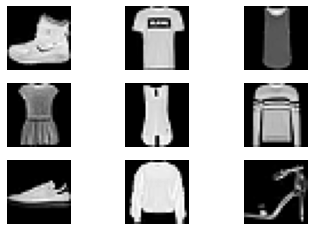

In [12]:
data = Preprocessing(X_train)
data.give_samples(9, 3, 3)

We have called the Preprocessing class with the "give_samples" function.
>
The parameters of the function are; 
* 9 as fashion samples amount, 
* 3 as rows of the subplot figure, and 
* 3 as columns of the subplot figure.

# Building Model

In [13]:
model = Sequential([                 
                   #First Layer 
                   Conv2D(filters=32, kernel_size=3, kernel_regularizer=l2(0.02), kernel_initializer="lecun_normal", padding="same", input_shape=X_train.shape[1:]),
                   BatchNormalization(),
                   Activation("selu"),
                   MaxPooling2D(pool_size=2),
                  
                   #Second Layer 
                   Conv2D(filters=64, kernel_size=3, kernel_regularizer=l2(0.02), kernel_initializer="lecun_normal", padding="same"),
                   BatchNormalization(),
                   Activation("selu"),
                   MaxPooling2D(pool_size=2),
                                       
                   #Third Layer               
                   Conv2D(filters=128, kernel_size=3, kernel_regularizer=l2(0.02), kernel_initializer="lecun_normal", padding="same"),
                   BatchNormalization(),
                   Activation("selu"),
                   MaxPooling2D(pool_size=2),
                  
                   #Fully Connected Layer
                   Flatten(),

                   #First Hidden Layer
                   Dense(128, kernel_regularizer=l2(0.02), kernel_initializer="lecun_normal"),
                   BatchNormalization(),
                   Activation("selu"),
                   Dropout(0.5),
                    
                   #Second Hidden Layer
                   Dense(64, kernel_regularizer=l2(0.02), kernel_initializer="lecun_normal"),
                   BatchNormalization(),
                   Activation("selu"),
                   Dropout(0.5),
                   
                   #Output Layer
                   Dense(nb_classes),
                   Activation("softmax"),                   
                   ])

We have built a Sequential API model. This model includes 3 convolution layers, 2 hidden layers as well as a fully connected layer. The last layer is an output layer. 
>
Lets now, explain all the layers detailed:

* ***The First Layer***:

>takes 28x28x1 image as input,

>creates 32 feature maps which have 3x3 shape. The new shape of the image will be 28x28x32,

>uses l2 regularizer as 0.02, which removes a small percentage of weights at each iteration. Therefore, weights will never be equal to zero.

>sets the initial random weights of the layer by "lecun_normal",

>uses "same" padding which leads to the output image with zero-padding will be the same shape as the input image,

>normalizes the values by Batch Normalization,

>uses SELU as activation function,

>shrinks half the shape of input image by choosing maximum pixel values. Due to MaxPooling2D, the shape of output will be 14x14x32.
                  

* ***The Second Layer***:

>takes the output image of the previous layer as input (14x14x32),

>creates 64 feature maps which have 3x3 kernel size. The new shape of the image will be 14x14x64,

>Others are same as the previous layer,

>After MaxPooling2D, the new shape of output will be 7x7x64.


* ***The Third Layer***:

>takes the output image of the previous layer as input (7x7x64),

>creates 128 feature maps which have kernel size. The new shape of image will be 7x7x128.

>Others are same as previous layer,

> After MaxPooling2D, the new shape of output will be 3x3x128.                                              
                                        


***Fully Connected Layer*** makes a vector by multiplies the output values coming from the previous layer: 3 * 3 * 64 = 1152.


***First Hidden Layer:***
> puts the vector into 128 neural networks which use "lecun_normal" as kernel initializer and 0.02 l2 rate as kernel regularizer,

> After neural network process, the values will be normalized by Batch Normalization,

> uses SELU as activation function,

> implements Dropout function which ignores %50 of all the neurons in the neural networks. It helps preventing overfitting.
                    

***Second Hidden Layer:***
> Same as the previous hidden layer, except the number of neural networks: 64.

***Output Layer***:
> puts the vector coming from the last hidden layer (64) into 10 neural networks which are the number of the class labels,

> uses "softmax" as activation function.

***LETS SEE THE PROCESS ABOVE CLEARER WITH THE NUMBER OF PARAMETERS***

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

# Compiling, Fitting and Evaluating the Model

In [15]:
optimizer= SGD(learning_rate=0.0005)

model.compile(loss="categorical_crossentropy", 
              optimizer=optimizer,
              metrics=["accuracy"])

We have compiled the model with:
* SGD taking 0.0005 learning rate as optimizer,
* categorical_crossentropy as loss,
* accuracy as evaluation metrics.

In [16]:
checkpoint=ModelCheckpoint("fashion_mnist_cnn.h5",
                           save_best_only=True)

early_stopping=EarlyStopping(patience=5,
                             restore_best_weights=True)

hist = model.fit(X_train, y_train, batch_size=batch_size,
                 epochs=epochs,
                 validation_split=0.2,
                 callbacks=[checkpoint, early_stopping],
                 shuffle=True,
                 verbose=1)

Epoch 1/20
750/750 [==============================] - 18s 6ms/step - loss: 9.6857 - accuracy: 0.5140 - val_loss: 8.6986 - val_accuracy: 0.7672
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 8.9298 - accuracy: 0.6637 - val_loss: 8.3644 - val_accuracy: 0.8013
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 8.5617 - accuracy: 0.7064 - val_loss: 8.0907 - val_accuracy: 0.8160
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 8.2571 - accuracy: 0.7322 - val_loss: 7.8353 - val_accuracy: 0.8262
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 7.9805 - accuracy: 0.7505 - val_loss: 7.5983 - val_accuracy: 0.8334
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 7.7243 - accuracy: 0.7660 - val_loss: 7.3680 - val_accuracy: 0.8395
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 7.4855 - accuracy: 0.7740 - val_loss: 7.1488 - val_accuracy: 0.8461
Epoch

The code above fit the model with X_train and y_train.
1. "checkpoint" variable lets the model loads parameters which give the best performance for model among epochs,
2. "early_stopping" variable lets the training of the model stops if no more improvement,
3. "hist" is a variable which the model has been fitted with the parameters below;
 * X_train and y_train as data and label,
 * 64 as batch_size values,
 * %20 validation data fetched out the train datasets,
 * callbacks parameter which implements the "checkpoint" and "early_stopping" variables on the model,
 * shuffle parameter helps preventing overfitting,
 * verbose parameter shows how model works in each epochs.

We can see the results and observes how the train and validation datasets reacted to the model in every epoch. 
>
According to the results above, our model has no overfitting as well as underfitting. In the beginning, the train dataset had a very big losses and little accuracy scores. But again, validation scores were better. As the epoch number increased, the model got improved.
>
NOTE that we have reached this result with only 20 epochs. You may try for the more...

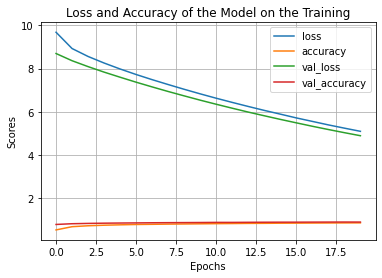

In [22]:
pd.DataFrame(hist.history).plot()
plt.title("Loss and Accuracy of the Model on the Training")
plt.xlabel("Epochs")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

The figure above shows us the epoch process as lineplot

In [19]:
model.save("fashion_mnist_cnn.h5")

We have saved the model in "h5" format.

Lets start to evaluate the model on the test dataset. This result will be the main result which we will make decision on finishing or going back to rearrange the model

In [23]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)

print("Loss of the Model on the Test Dataset:", loss)
print("Accuracy of the Model on the Test Dataset:", accuracy)

157/157 [==============================] - 1s 4ms/step - loss: 4.9004 - accuracy: 0.8749
Loss of the Model on the Test Dataset: 4.900382041931152
Accuracy of the Model on the Test Dataset: 0.8748999834060669


The model has worked well on the test dataset.

***Lets see some predictions***

In [24]:
pred = model.predict(X_test[:10])

pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.04, 0.01, 0.03, 0.  , 0.85, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.02, 0.  , 0.87, 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.8 , 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.02, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

The result above gives us the predictions of the first 10 pictures in X_test as possibility.
>
Let's now compare the predictions with the real labels.

In [25]:
pred_classes = np.argmax(pred, axis=1)
real_classes = np.argmax(y_test[:10], axis=1)

print(f"The labels, which medel predicted, are: {pred_classes}")
print(f"The real labels are: {real_classes}")

The labels, which medel predicted, are: [9 2 1 1 6 1 4 6 5 7]
The real labels are: [9 2 1 1 6 1 4 6 5 7]


All is correct